In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_data(name):
    path_CPM = "~/isomirs/Bimodal_mir22/differ_expr_genes/"+name+"/"+name+"_isomiR_5prime_CPM.tsv"
    path_phenotype = "TCGA-"+name+".GDC_phenotype.tsv"
        
    df = pd.read_csv(path_CPM, sep = '\t')
    cond_cancer = df.columns.str.contains('-0[1-9][A-Z]', regex = True)
    df_cancer = df[df.columns[cond_cancer]]
    mirna22 = df_cancer.loc["hsa-miR-22-3p|+1"] 
    left, right = mirna22[mirna22 < 11].index, mirna22[mirna22 > 11].index
    
    data = pd.read_csv(path_phenotype, sep = '\t', index_col = 0)
    
    return data, mirna22, left

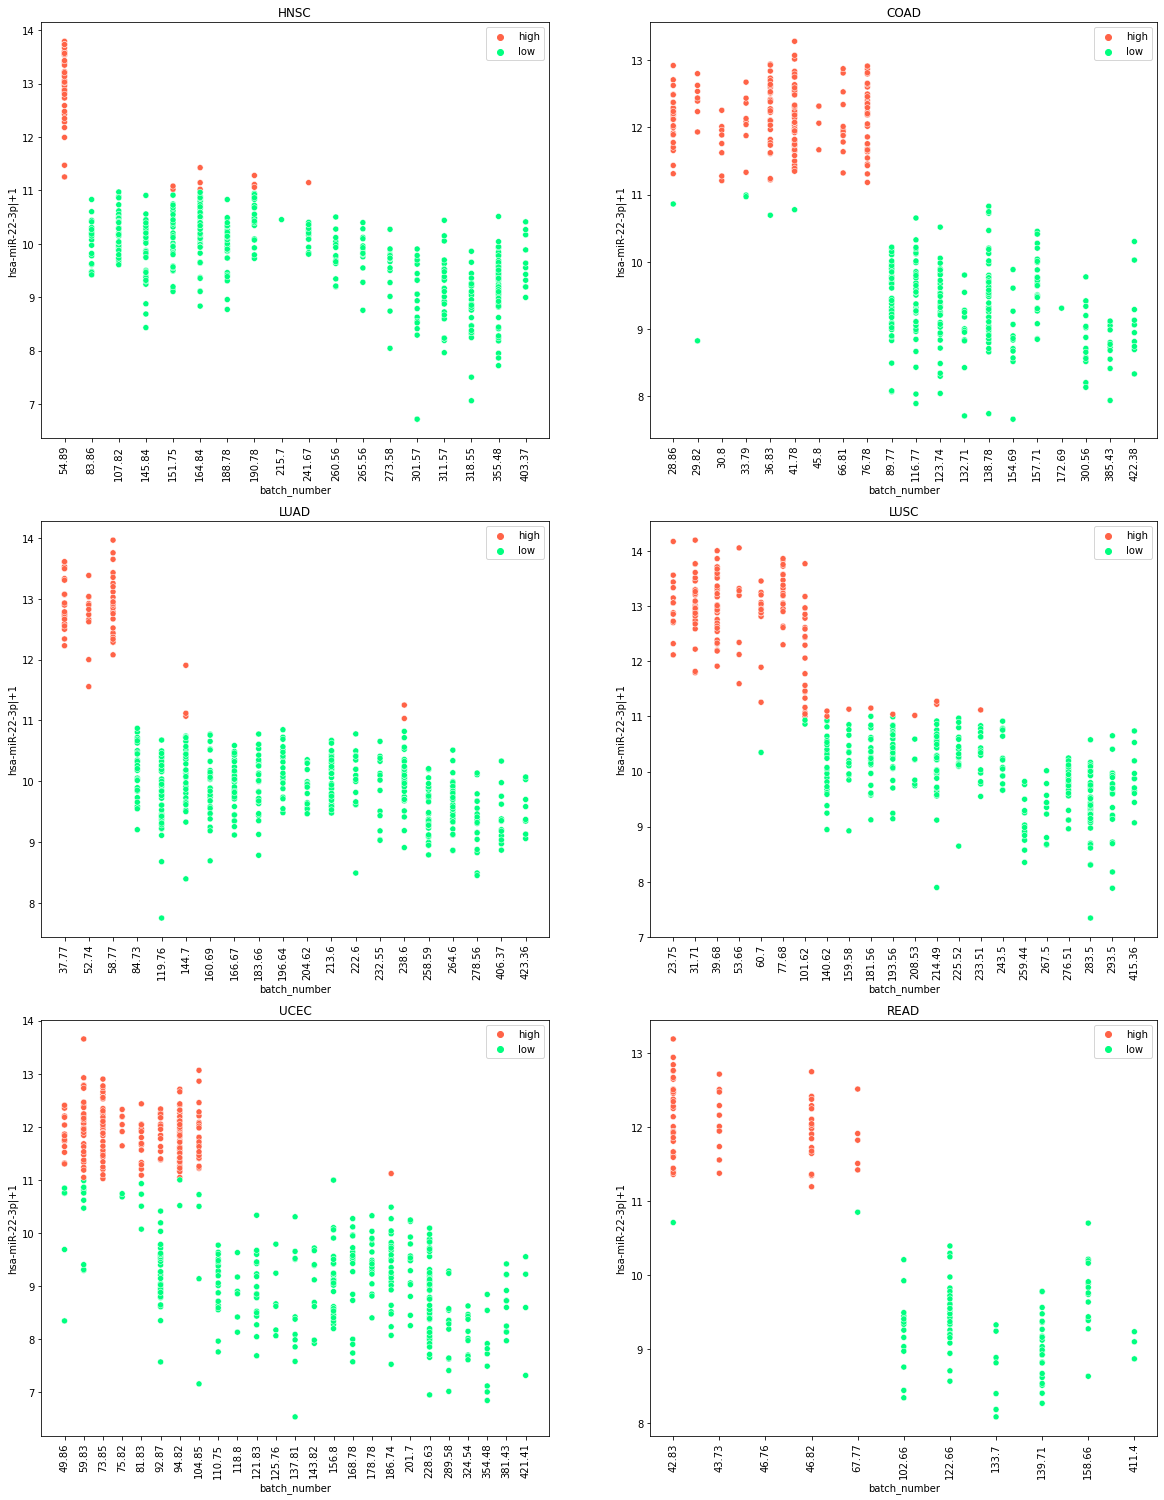

In [5]:
names = [['HNSC', 'COAD'], ['LUAD', 'LUSC'], ['UCEC', 'READ']]
fig, axs = plt.subplots(3, 2, figsize = (20, 26))
for i in range(3):
    for j in range(2):
        name = names[i][j]
        data, mirna22, left = get_data(name)
        
        new_b = list(map(lambda i: int(i.split('.')[0]) + int(i.split('.')[1])/100, data["batch_number"].values))
        data['batch_number'] = new_b
        data = data.sort_values(by = 'batch_number')
        data['batch_number'] = data['batch_number'].astype(str)

        batch = pd.concat([data, mirna22], axis=1)[["hsa-miR-22-3p|+1", "batch_number"]]
        y = np.array(['low' if i in left else 'high' for i in batch.index])

        axs[i][j].set_title(name)
        sns.scatterplot(x = "batch_number", y = "hsa-miR-22-3p|+1", data = batch,
                       hue = y,palette = ['tomato', 'springgreen'], ax = axs[i][j])

        axs[i][j].tick_params(axis='x', labelrotation = 90)

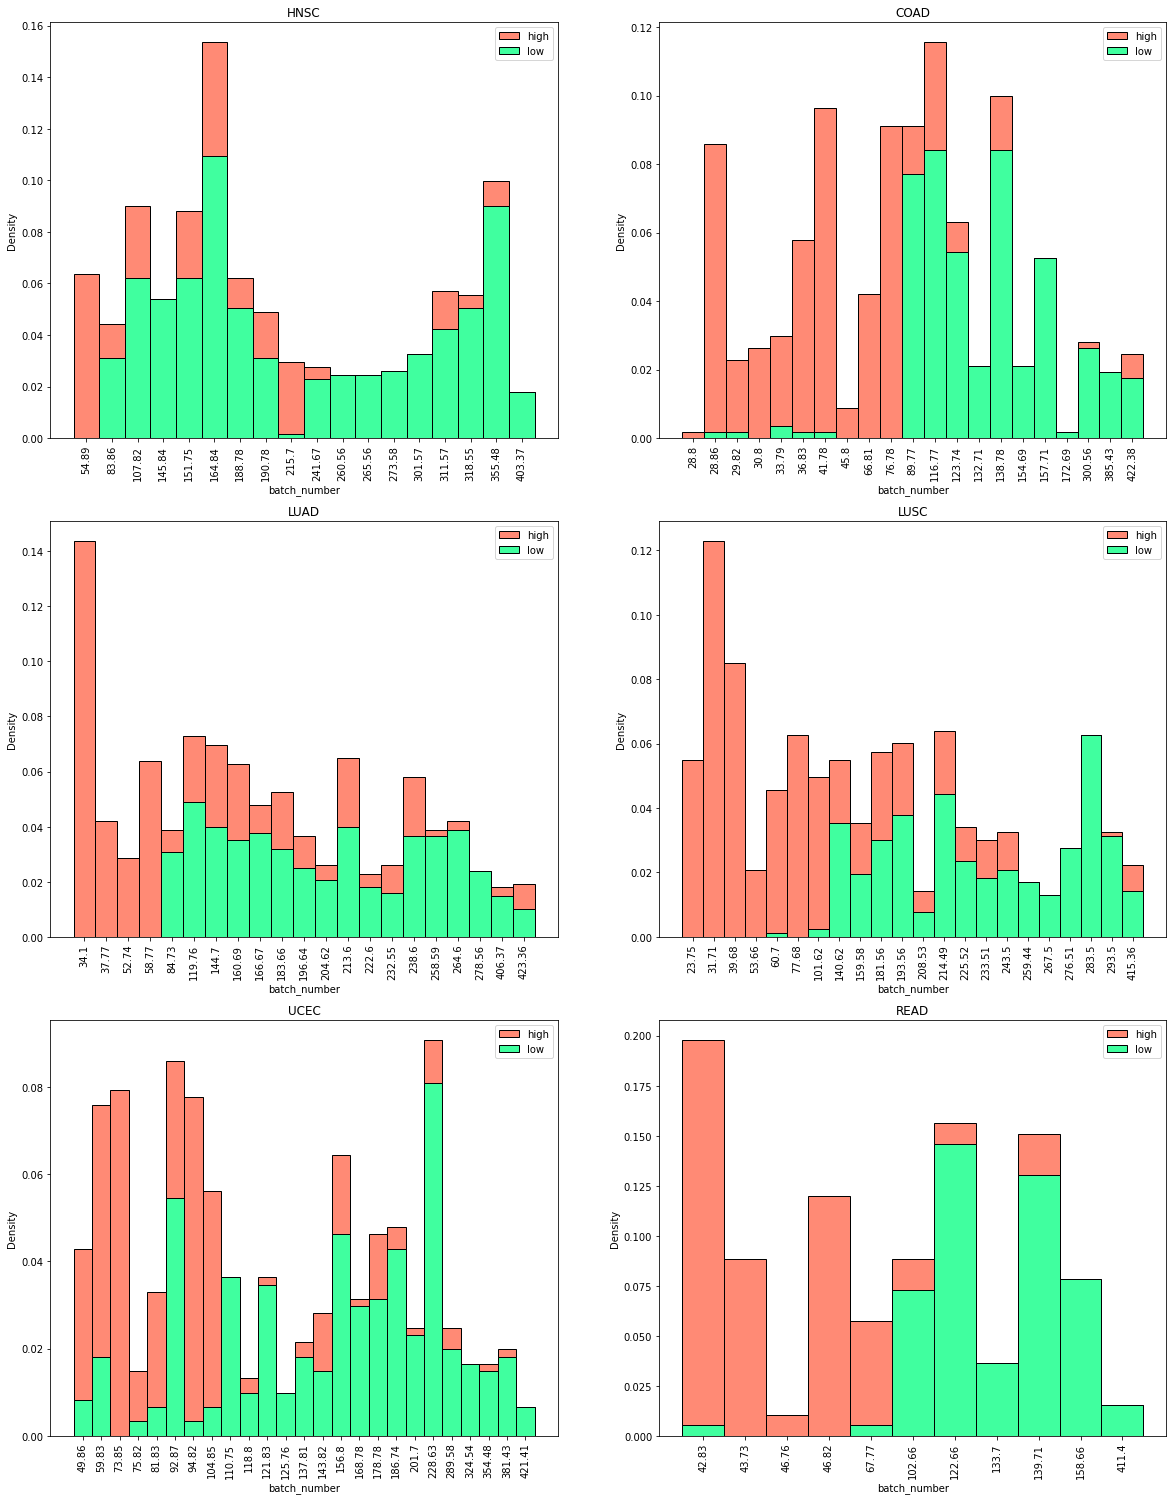

In [6]:
fig, axs = plt.subplots(3, 2, figsize = (20, 26))
for i in range(3):
    for j in range(2):
        name = names[i][j]
        data, mirna22, left = get_data(name)
        
        new_b = list(map(lambda i: int(i.split('.')[0]) + int(i.split('.')[1])/100, data["batch_number"].values))
        data['batch_number'] = new_b
        data = data.sort_values(by = 'batch_number')
        data['batch_number'] = data['batch_number'].astype(str)

        batch = pd.concat([data, mirna22], axis=1)[["hsa-miR-22-3p|+1", "batch_number"]]
        y = np.array(['low' if i in left else 'high' for i in batch.index])

        axs[i][j].set_title(name)
        sns.histplot(data = batch, x = "batch_number", hue = y, stat = 'density',
                     multiple='stack', palette = ['tomato', 'springgreen'], ax = axs[i][j])

        axs[i][j].tick_params(axis='x', labelrotation = 90)